In [1]:
import pandas as pd
import numpy as np
import pycountry
import geopandas as gpd
import matplotlib.pyplot as plt

              country  Gasoline (1 liter) (USD)   latitude   longitude  \
4841  Dem. Rep. Congo                       NaN  43.804133 -120.554201   

      gas_price_per_gallon  
4841                 5.277  


/home/reed/Global-Cost-of-Living/venv/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


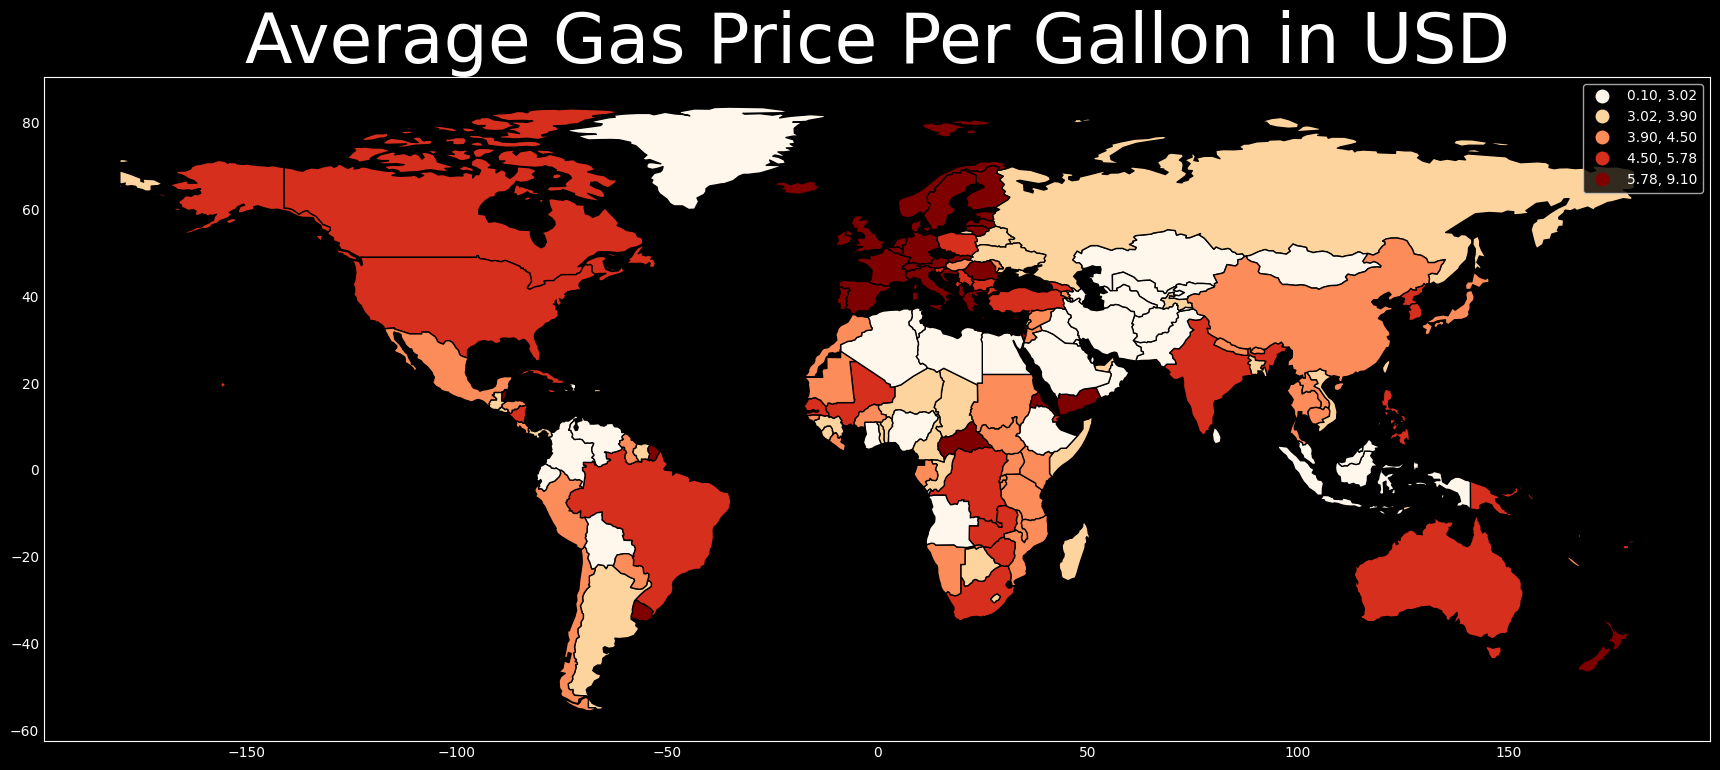

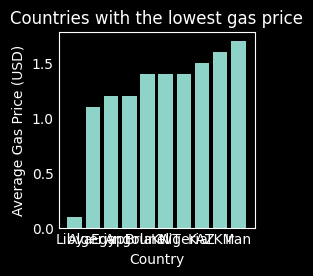

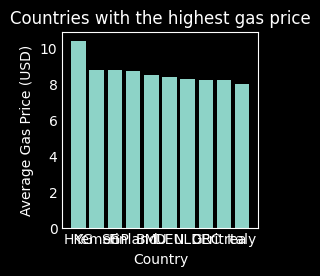

In [4]:
import pandas as pd

cost_df = pd.read_csv('./data/cost-of-living.csv', header=0)

cost_df.sort_values(by=['country', 'city'], ascending=True, inplace=True)

cost_df.set_index('No.', inplace=True)
cost_df = cost_df.rename(columns={'x33': 'Gasoline (1 liter) (USD)', 'x48': 'Apartment (1 bedroom) in City Centre (USD)', 'x49': 'Apartment (1 bedroom) Outside of Centre (USD)', 'x50': 'Apartment (3 bedrooms) in City Centre (USD)', 'x51': 'Apartment (3 bedrooms) Outside of Centre (USD)'})
cost_df['Gasoline (1 liter) (USD)']

#------------------------average price per liter of gas in each country---------------------------
import numpy as np
import pycountry
import geopandas as gpd
import matplotlib.pyplot as plt

with_lat_long_file = "./data/data_with_lat_long.csv"
lat_long_df = pd.read_csv(with_lat_long_file, header=0, 
                      usecols=["latitude", "longitude", 'Gasoline (1 liter) (USD)','country', 'gas_price_per_gallon'])
#manually add data for DRC
lat_long_df.loc[len(lat_long_df.index)] = {'country': 'Dem. Rep. Congo' , 'gas_price_per_gallon': 5.277, 'latitude': 43.804133, 'longitude': -120.554201}
lat_long_df.loc[len(lat_long_df.index)] = {'country': 'Congo' , 'gas_price_per_gallon': 3.79, 'latitude': 18.220833, 'longitude': -66.590149}
lat_long_df.loc[len(lat_long_df.index)] = {'country': 'Central African Rep.' , 'gas_price_per_gallon': 9.104, 'latitude': 41.203322, 'longitude': -77.194525}
lat_long_df.loc[len(lat_long_df.index)] = {'country': 'S. Sudan', 'gas_price_per_gallon': 4.062, 'latitude': 8.7666, 'longitude': 27.400066,}

print(lat_long_df[lat_long_df.eq("Dem. Rep. Congo").any(1)])
#creates a new column averaging the gas price per country
lat_long_df['avg_gas_price_per_country'] = np.round(lat_long_df.groupby(['country'])[['gas_price_per_gallon']].transform(np.mean), decimals = 1)
#drop the duplicates to only present one country and its average price of gas
lat_long_df.drop_duplicates(ignore_index=True, subset=['country','avg_gas_price_per_country'], inplace=True)

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
#make a country code column in my lat_long_df
lat_long_df['CODE']=alpha3code(lat_long_df.country)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#rename the 'name' column to 'country to merge with my data set
world.columns=['pop_est', 'continent', 'country', 'CODE', 'gdp_md_est', 'geometry']
#rename United States of America to United States to be consistent with original data file. The DRC and Myanma are also missing but there is no data on the DRC in our data set.
def rename_countries(value):
    if value == "United States of America":
        return 'United States'
    else:
        return value
world['country'] = world['country'].map(rename_countries)
merged_df=pd.merge(world,lat_long_df,on='country')

merged_df.plot(column='avg_gas_price_per_country', scheme="quantiles", edgecolor="black",
           figsize=(17, 13.3),
           legend=True,cmap='OrRd')
plt.title('Average Gas Price Per Gallon in USD',fontsize=50)
#add countries names and numbers 
# for i in range(len(merged_df.CODE_x)):
#     plt.text(float(merged_df.longitude[i]),float(merged_df.latitude[i]),"{}\n{}".format(merged_df.CODE_x[i],merged_df['avg_gas_price_per_country'][i]),size=7)
plt.style.use('_mpl-gallery-nogrid')
plt.show()

#----------------------bar chart showing the countries with the lowest gas price--------------------------------
lat_long_df[['country','avg_gas_price_per_country']].sort_values(by='avg_gas_price_per_country').head(10)
min_gas_price_dict = {
    'Country': ['Libya', 'Algeria', 'Egypt', 'Angola', 'Brunei', 'KWT', 'Nigeria', 'KAZ', 'TKM', 'Iran'],
    'avg_price_per_country': [0.1, 1.1, 1.2, 1.2, 1.4, 1.4, 1.4, 1.5, 1.6, 1.7]
 }
min_prices = pd.DataFrame(min_gas_price_dict)
# library
# give your chart some style
plt.style.use('dark_background')
# # 1st arg is column for x-axis, 2nd arg is column for y-axis
plt.bar(min_prices['Country'], min_gas_price_dict['avg_price_per_country'])
#give the chart a title
plt.title("Countries with the lowest gas price")  
# label the x and y axes
plt.xlabel('Country')
plt.ylabel('Average Gas Price (USD)')
# show the chart
plt.show()

#bar chart showing the countries with the highest gas price
lat_long_df[['country','avg_gas_price_per_country']].sort_values(by='avg_gas_price_per_country').tail(30)
max_gas_price_dict = {
    'Country': ['HKG', 'Yemen', 'SGP', 'Finland', 'BMU', 'DEU', 'NLD', 'GRC', 'Eritrea', 'Italy'],
    'avg_price_per_country': [10.4, 8.8, 8.8, 8.7, 8.5, 8.4, 8.3, 8.2, 8.2, 8.0]
 }
max_prices = pd.DataFrame(max_gas_price_dict)
# library
# give your chart some style
plt.style.use('dark_background')
# # 1st arg is column for x-axis, 2nd arg is column for y-axis
plt.bar(max_prices['Country'], max_gas_price_dict['avg_price_per_country'])
#give the chart a title
plt.title("Countries with the highest gas price")  
# label the x and y axes
plt.xlabel('Country')
plt.ylabel('Average Gas Price (USD)')
# show the chart
plt.show()

#---------------------displays a zoomable map showing the gas price of each country per gallong in USD----------------------------------
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of gas prices per gallong in USD
for i in range(len(lat_long_df)):
        lat = lat_long_df.iloc[i]['latitude']
        long = lat_long_df.iloc[i]['longitude']
        radius=5
        popup_text = """Country : {}<br>
                    Gas Price : {}<br>"""
        popup_text = popup_text.format(lat_long_df.iloc[i]['country'],
                                   lat_long_df.iloc[i]['gas_price_per_gallon']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

#-----------another interactive world map displaying gas prices of all cities we have data on---------------------
cities = pd.read_csv("./data/worldcities.csv", header=0)
cities_lat_long = pd.merge(cities, cost_df, on='city')
cities_lat_long = cities_lat_long.rename(columns={'Gasoline (1 liter) (USD)': 'gas_price_per_liter'})
cities_lat_long.drop_duplicates(ignore_index=True, subset=['city', 'gas_price_per_liter'], inplace=True)
cities_lat_long.dropna(subset=['gas_price_per_liter'], inplace=True)
#converting price per liter to gallon
def liter_to_gallon(value):
  gallon = value*3.785411784
  return gallon
cities_lat_long['gas_price_per_gallon'] = np.round(cities_lat_long['gas_price_per_liter'].map(liter_to_gallon), decimals=2)

# Create a world map to show global gas prices 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map_cities= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map_cities)
#for each coordinate, create circlemarker of user percent
for i in range(len(cities_lat_long)):
        lat = cities_lat_long.iloc[i]['lat']
        long = cities_lat_long.iloc[i]['lng']
        radius=5
        popup_text = """Country: {} <br>
                        City : {} <br>
                    Gas Price : ${} <br>"""
        popup_text = popup_text.format(cities_lat_long.iloc[i]['country_y'], 
                                        cities_lat_long.iloc[i]['city'],
                                   cities_lat_long.iloc[i]['gas_price_per_gallon']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map_cities

In [5]:
#save the map as an html
world_map_cities.save("world_interactive_gas_price_map_Nov_2022")